In [35]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

In [36]:
df_carnes = pd.read_csv('C:/Users/donos/OneDrive/Escritorio/Ejercicios-Analisis/analisis 3/carne-bovina-original.csv', encoding='iso-8859-1')

In [37]:
df_carnes.head(4)

,pais_id,pais,provincia_id,provincia,departamento_id,departamento,prov_depto,año,mes,modelo,...,ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha),Unnamed: 21,Unnamed: 22,Unnamed: 23
0,32,Argentina,6,Buenos Aires,105,Bolivar,6105,2018,2,buenos aires centro-sudoeste,...,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
1,32,Argentina,6,Buenos Aires,231,Daireaux,6231,2018,2,buenos aires centro-sudoeste,...,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
2,32,Argentina,6,Buenos Aires,203,Coronel Suarez,6203,2018,2,buenos aires centro-sudoeste,...,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
3,32,Argentina,14,Cordoba,42,General San Martin,14042,2018,2,centro cordoba sur,...,4589,2544,1909,36,157,65,436,NaN,NaN,NaN


In [38]:
#informacion de la tabla

In [39]:
df_carnes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pais_id                   2598 non-null   int64  
 1   pais                      2598 non-null   object 
 2   provincia_id              2598 non-null   int64  
 3   provincia                 2598 non-null   object 
 4   departamento_id           2598 non-null   int64  
 5   departamento              2598 non-null   object 
 6   prov_depto                2598 non-null   int64  
 7   año                       2598 non-null   int64  
 8   mes                       2598 non-null   int64  
 9   modelo                    2598 non-null   object 
 10  actividad                 2598 non-null   object 
 11  referencia                2598 non-null   object 
 12  margen_bruto_($/ha)       2598 non-null   int64  
 13  resultado_neto_($/ha)     2598 non-null   int64  
 14  ingreso_

In [40]:
#sacamos las descripcione estadisticas estadisticas de la tabla 

In [41]:
df_carnes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pais_id,2598.0,32.000000,0.000000,32.0,32.0,32.0,32.00,32.0
provincia_id,2598.0,34.338722,28.035664,6.0,14.0,22.0,62.00,86.0
departamento_id,2598.0,159.347960,193.412957,7.0,42.0,91.0,154.00,854.0
prov_depto,2598.0,34498.070054,27952.465277,6007.0,14042.0,22119.0,62054.25,86189.0
año,2598.0,2016.101617,0.957546,2015.0,2015.0,2016.0,2017.00,2018.0
mes,2598.0,6.516166,3.358838,2.0,5.0,8.0,11.00,11.0
margen_bruto_($/ha),2598.0,1001.076212,725.409867,-107.0,477.0,645.0,1400.00,3148.0
resultado_neto_($/ha),2598.0,414.786759,531.999711,-1299.0,119.0,241.0,750.00,1761.0
ingreso_neto_($/ha),2598.0,1585.558122,1344.484555,205.0,664.0,1013.0,2286.00,5980.0
gastos_directos_($/ha),2598.0,584.456505,864.813956,46.0,137.0,228.0,423.00,4424.0


In [42]:
#observamos que columnas tienen valores nulos

In [43]:
df_carnes.isnull().sum()

pais_id                        0
pais                           0
provincia_id                   0
provincia                      0
departamento_id                0
departamento                   0
prov_depto                     0
año                            0
mes                            0
modelo                         0
actividad                      0
referencia                     0
margen_bruto_($/ha)            0
resultado_neto_($/ha)          0
ingreso_neto_($/ha)            0
gastos_directos_($/ha)         0
costos_indirectos_($/ha)       0
eficiencia_stock_(%)           0
producción_(kg/ha)             0
destete_(%)                    0
carga_(kg/ha)                  0
Unnamed: 21                 2598
Unnamed: 22                 2598
Unnamed: 23                 2557
dtype: int64

In [44]:
#observamos en cada columna cuantos valores unicos tienen

In [45]:
cols = df_carnes.columns

In [46]:
df_carnes[cols].nunique()

pais_id                       1
pais                          1
provincia_id                 13
provincia                    13
departamento_id              75
departamento                199
prov_depto                  224
año                           4
mes                           4
modelo                       21
actividad                     3
referencia                    1
margen_bruto_($/ha)         218
resultado_neto_($/ha)       213
ingreso_neto_($/ha)         224
gastos_directos_($/ha)      190
costos_indirectos_($/ha)    209
eficiencia_stock_(%)         22
producción_(kg/ha)           26
destete_(%)                  11
carga_(kg/ha)                41
Unnamed: 21                   0
Unnamed: 22                   0
Unnamed: 23                  22
dtype: int64

In [47]:
#observamos que las ultimas 3 columnas no poseen valores de utilidad
#observamos que tienen muchos valores null
#procedemos a eliminar esas 3 columnas

In [48]:
df_carnes = df_carnes.dropna(axis=1)

In [49]:
df_carnes.head(4)

,pais_id,pais,provincia_id,provincia,departamento_id,departamento,prov_depto,año,mes,modelo,...,referencia,margen_bruto_($/ha),resultado_neto_($/ha),ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha)
0,32,Argentina,6,Buenos Aires,105,Bolivar,6105,2018,2,buenos aires centro-sudoeste,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
1,32,Argentina,6,Buenos Aires,231,Daireaux,6231,2018,2,buenos aires centro-sudoeste,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
2,32,Argentina,6,Buenos Aires,203,Coronel Suarez,6203,2018,2,buenos aires centro-sudoeste,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
3,32,Argentina,14,Cordoba,42,General San Martin,14042,2018,2,centro cordoba sur,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,2045,136,4589,2544,1909,36,157,65,436


In [50]:
#cantidad total de registros de ventas de carne

In [51]:
total_ventas_carnes = df_carnes['modelo'].count()
print(total_ventas_carnes)

2598


In [52]:
#Calcular el ingreso neto promedio por hectárea y las estadísticas descriptivas

In [53]:
df_ingresoNeto = df_carnes['ingreso_neto_($/ha)'].mean()
print(df_ingresoNeto)

1585.5581216320247


In [54]:
#Calcular el margen bruto promedio.

In [55]:
df_margen_bruto = df_carnes['margen_bruto_($/ha)'].mean()
print(df_margen_bruto)

1001.0762124711316


In [56]:
#Calcular la eficiencia de stock promedio

In [57]:
df_eficiencia_stock = df_carnes['eficiencia_stock_(%)'].mean()
print(df_eficiencia_stock)

32.75519630484988


In [58]:
#Calcular la producción promedio

In [59]:
df_producción = df_carnes['producción_(kg/ha)'].mean()
print(df_producción)

78.70823710546574


In [60]:
#mostramos de manera asendenete los modelos que tuvieron peor margen_bruto_($/ha) de la tabla

In [61]:
df_carnes.sort_values(by = 'margen_bruto_($/ha)', ascending =False)['modelo'].head(10)

1485    pampeana subhumeda
1471    pampeana subhumeda
1473    pampeana subhumeda
1469    pampeana subhumeda
1474    pampeana subhumeda
1478    pampeana subhumeda
1479    pampeana subhumeda
1480    pampeana subhumeda
1481    pampeana subhumeda
1482    pampeana subhumeda
Name: modelo, dtype: object

In [62]:
#mostramos de manera asendente los modelos que tuvieron el mejor margen_bruto_($/ha) de la tabla

In [63]:
df_carnes.sort_values(by = 'margen_bruto_($/ha)', ascending =False)['modelo'].tail(10)

1864    entre rios sw
1874    entre rios sw
1872    entre rios sw
1867    entre rios sw
1865    entre rios sw
1866    entre rios sw
1868    entre rios sw
1869    entre rios sw
1870    entre rios sw
1873    entre rios sw
Name: modelo, dtype: object

In [64]:
#observamos la producción_(kg/ha)referente al año

In [65]:
df_años = df_carnes.groupby('año')['producción_(kg/ha)'].mean().reset_index()

([<matplotlib.axis.XTick at 0x21097d69790>,
 [Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018')])

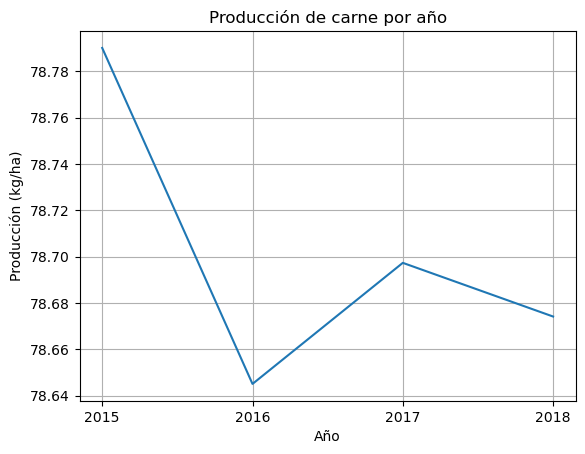

In [71]:
x = pd.to_numeric(df_años['año'])

# Graficar los datos
plt.plot(x, df_años['producción_(kg/ha)'])
plt.title('Producción de carne por año')
plt.xlabel('Año')
plt.ylabel('Producción (kg/ha)')
plt.grid(True)

# Establecer los ticks en el eje x
plt.xticks(np.arange(x.min(), x.max()+1, 1))

In [ ]:
#graficamos los diferentes tipos de modelos de carnes segun su promedio de  produccion

In [ ]:
df_modelo_produccion = df_carnes[['modelo', 'producción_(kg/ha)']]


In [ ]:
promedio_produccion_por_modelo = df_modelo_produccion.groupby('modelo')['producción_(kg/ha)'].mean()


In [ ]:
plt.figure(figsize=(10, 6))
promedio_produccion_por_modelo.plot(kind='bar')
plt.xlabel('Modelo de carne')
plt.ylabel('Producción promedio (kg/ha)')
plt.title('Producción promedio por modelo de carne')
plt.grid(True)

In [ ]:
# graficamos segun su actividad 

In [ ]:
frecuencia_actividad = df_carnes['actividad'].value_counts()

In [ ]:
plt.bar(frecuencia_actividad.index, frecuencia_actividad.values)
plt.xlabel('Actividad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Actividad')
plt.grid(True)

In [ ]:
#tomamos los 3 promedios mayores en produccion y miramos que tipo de actividad practican mas

In [ ]:
#entre rios sw
#cuepampena subhumeda
#centro cordoba sur

In [72]:
df_entre_rios = df_carnes[df_carnes['modelo'] == 'entre rios sw']
actividades = df_entre_rios['actividad']
frecuencia_actividades = actividades.value_counts()

In [73]:
df_pampeana_subhumeda = df_carnes[df_carnes['modelo'] == 'pampeana subhumeda']
actividades2 = df_pampeana_subhumeda['actividad']
frecuencia_actividades2 = actividades2.value_counts()

In [74]:
df_centro_cordoba_sur = df_carnes[df_carnes['modelo'] == 'centro cordoba sur']
actividades3 = df_centro_cordoba_sur['actividad']
frecuencia_actividades3 = actividades3.value_counts()

In [75]:
actividades = df_carnes['actividad']
frecuencia_global = actividades.value_counts()

In [76]:
df_pampeana_subhumeda.head(4)

,pais_id,pais,provincia_id,provincia,departamento_id,departamento,prov_depto,año,mes,modelo,...,referencia,margen_bruto_($/ha),resultado_neto_($/ha),ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha)
144,32,Argentina,6,Buenos Aires,7,Adolfo Alsina,6007,2018,2,pampeana subhumeda,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1210,709,1936,726,500,35,65,75,186
145,32,Argentina,6,Buenos Aires,154,Carlos Tejedor,6154,2018,2,pampeana subhumeda,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1210,709,1936,726,500,35,65,75,186
146,32,Argentina,6,Buenos Aires,392,General Villegas,6392,2018,2,pampeana subhumeda,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1210,709,1936,726,500,35,65,75,186
147,32,Argentina,6,Buenos Aires,399,Guamini,6399,2018,2,pampeana subhumeda,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1210,709,1936,726,500,35,65,75,186


(-1.0999988488716679,
 1.0999999451843652,
 -1.099998326627749,
 1.0999997051162977)

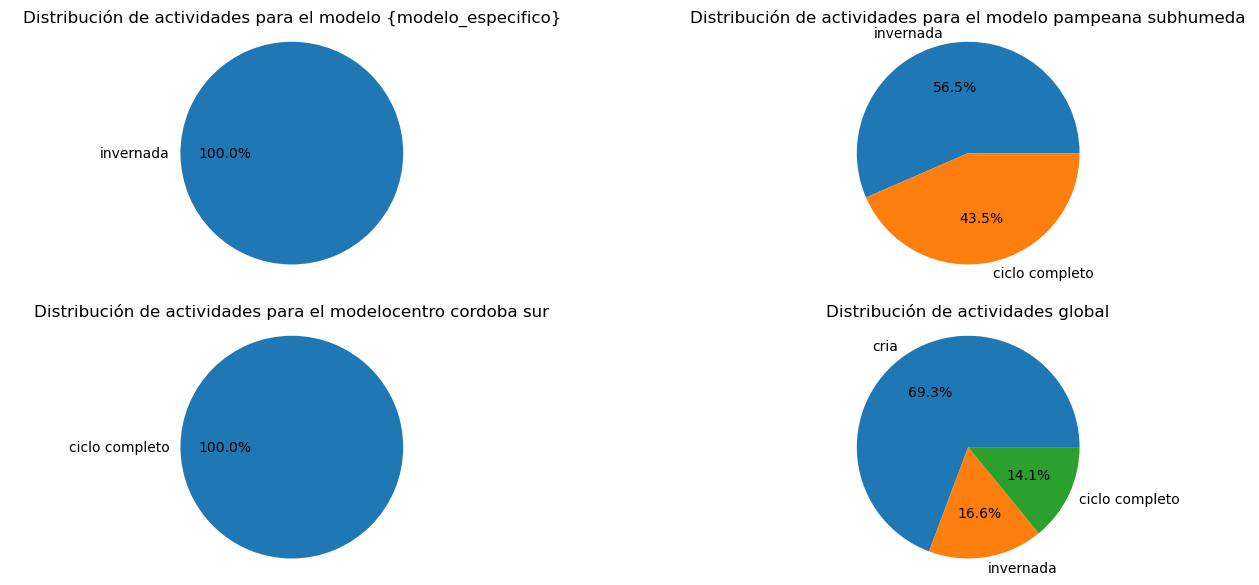

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 7))

# Subtrama 1: Distribución de actividades para el modelo x
axes[0,0].pie(frecuencia_actividades.values, labels=frecuencia_actividades.index, autopct='%1.1f%%')
axes[0,0].set_title('Distribución de actividades para el modelo {modelo_especifico}')
axes[0,0].axis('equal')

# Subtrama 2: Distribución de actividades para otro modelo
axes[0,1].pie(frecuencia_actividades2.values, labels=frecuencia_actividades2.index, autopct='%1.1f%%')
axes[0,1].set_title('Distribución de actividades para el modelo pampeana subhumeda')
axes[0,1].axis('equal')

#subtrama 3 Distribucion de actividades para el modelo de centro cordoba
axes[1,0].pie(frecuencia_actividades3.values, labels=frecuencia_actividades3.index, autopct='%1.1f%%')
axes[1,0].set_title('Distribución de actividades para el modelocentro cordoba sur')
axes[1,0].axis('equal')

#subtrama 4 distribucion global de las actividades
axes[1,1].pie(frecuencia_global.values, labels = frecuencia_global.index,autopct='%1.1f%%')
axes[1,1].set_title('Distribución de actividades global')
axes[1,1].axis('equal')

In [ ]:
#Realizar pruebas de hipótesis utilizando bibliotecas estadísticas como SciPy para determinar si hay diferencias significativas entre las variables

In [79]:
# Separar los datos de producción en diferentes grupos según los años
grupos = []
for año in df_carnes['año'].unique():
    grupo = df_carnes[df_carnes['año'] == año]['producción_(kg/ha)']
    grupos.append(grupo)

In [80]:
# Realizar una prueba de hipótesis, por ejemplo, una prueba t de muestras independientes
statistic, p_value = stats.f_oneway(*grupos)

In [81]:
# Evaluar el valor p para determinar si hay diferencias significativas
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No se encontraron diferencias significativas entre los grupos.")

No se encontraron diferencias significativas entre los grupos.


In [82]:
print("Valor p:", p_value)

Valor p: 0.9999825829618523
